Total amount of images: 354
Dataset contains 708 image pairs
Train contains 566 image pairs
Validation contains 70 image pairs
Test contains 72 image pairs


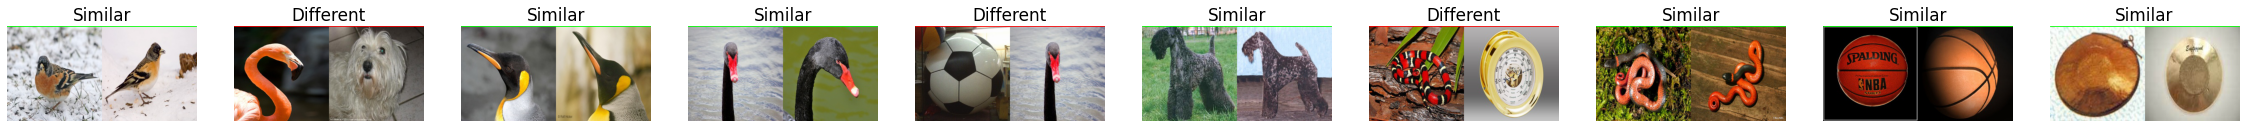

In [1]:
import sys
sys.path.append('../../utility')
import util
import numpy as np

folders = util.load_images('../../data/dataset_pairs')
data, labels = util.create_pairs(folders)
data, labels = util.shuffle_data(data, labels)
data_split, labels_split = util.split_data(data, labels)
data_train, data_val, data_test = data_split
labels_train, labels_val, labels_test = labels_split

print('Dataset contains', data.shape[0], 'image pairs')
print('Train contains', data_train.shape[0], 'image pairs')
print('Validation contains', data_val.shape[0], 'image pairs')
print('Test contains', data_test.shape[0], 'image pairs')

util.visualize(data_train, labels_train)

In [16]:
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization
from keras.models import Sequential
from keras.applications.resnet import ResNet50

input_shape = (224, 224, 3)

# ResNet50 Feature Extraction
resnet_embedding = Sequential(name='resnet_embedding')
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet.Trainable = False
resnet_embedding.add(resnet)
resnet_embedding.add(GlobalAveragePooling2D())
resnet_embedding.trainable = False

resnet_embedding.summary()

Model: "resnet_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
similarity = util.get_similarity_from_embedding(resnet_embedding, data_test)

Took 10.66 seconds to predict 72 image pairs
Prediction time: 0.15 seconds


Best accuracy: 0.5694444444444444
resnet
- Amount of TP: 28
- Amount of TN: 13
- Amount of FP: 23
- Amount of FN: 8
- AUC score: 0.6111111111111112
- Accuracy: 0.5694444444444444
- Recall: 0.7777777777777778
- Precision: 0.5490196078431373
- F1: 0.6436781609195402
- Kappa: 0.13888888888888884


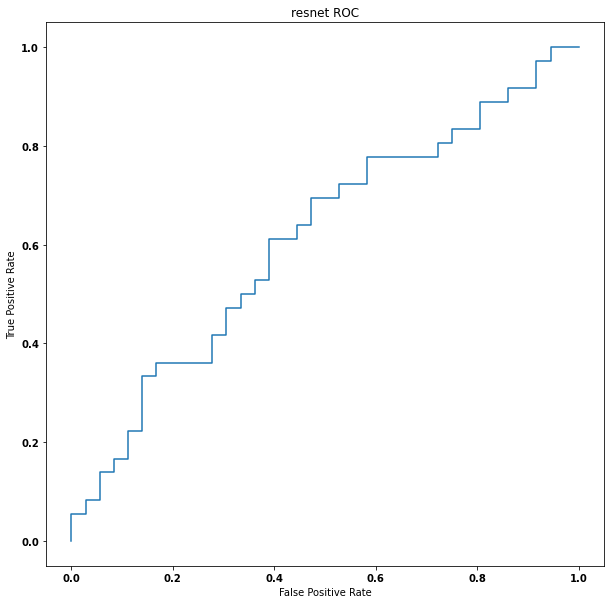

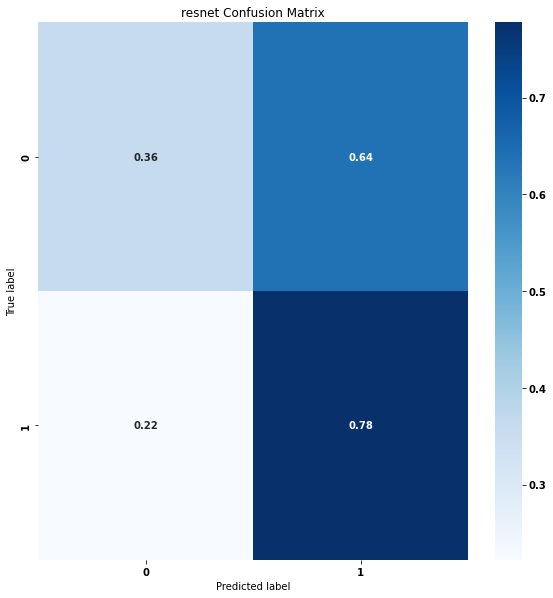

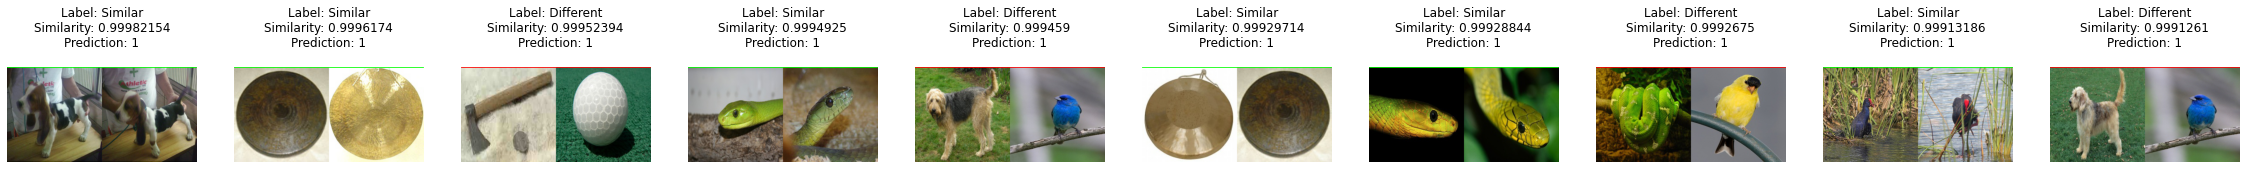

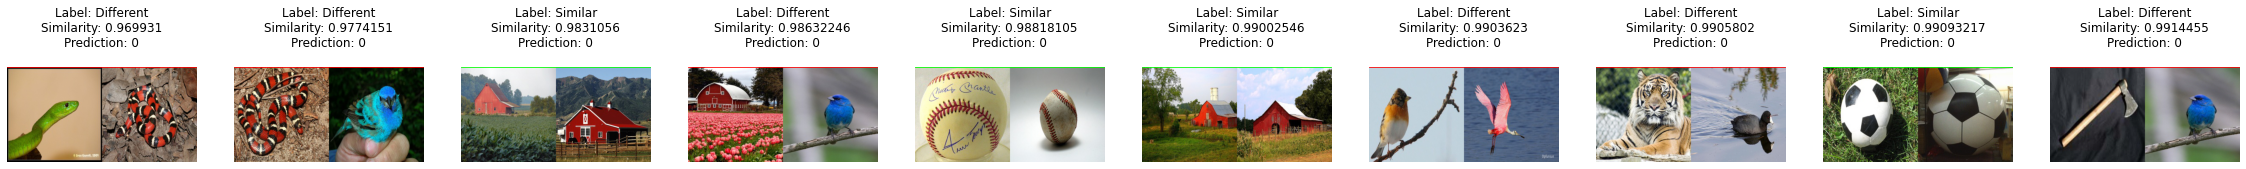

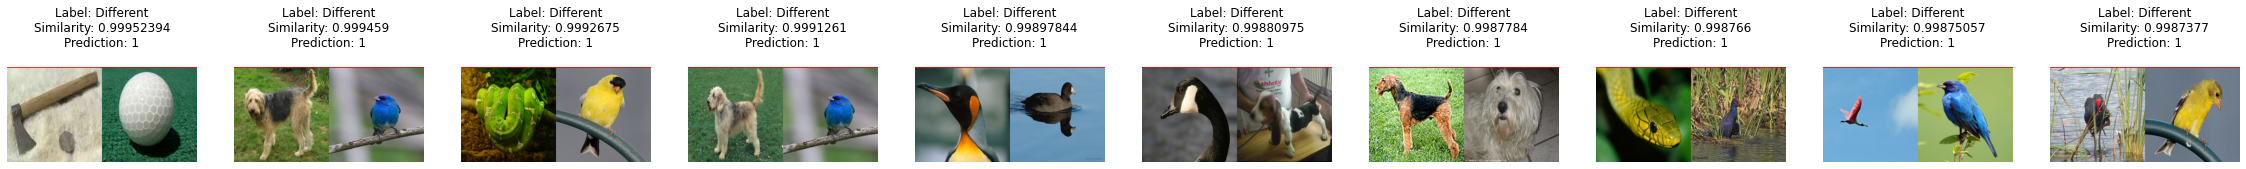

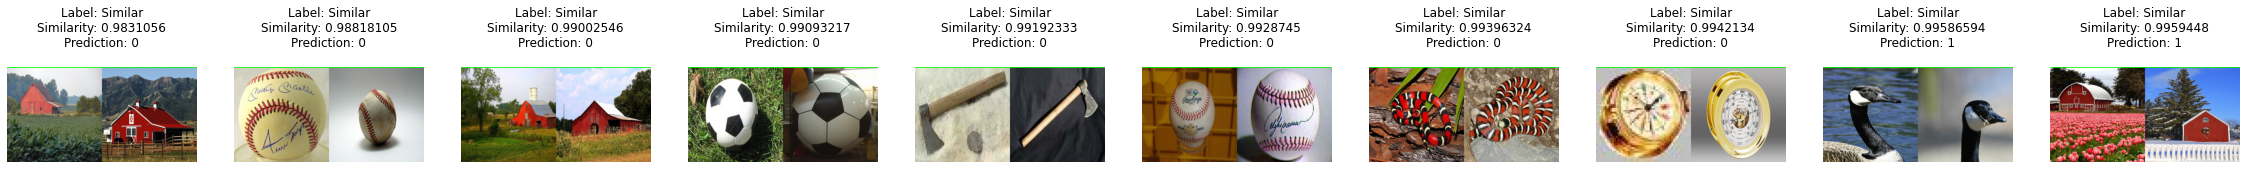

Threshold:  0.9950000000000008


In [15]:
util.evaluate(data=data_test, labels=labels_test, similarity=similarity, name="resnet")

In [5]:
resnet_embedding.save('./pretrained_resnet_embedding_extractor.h5')

In [6]:
!tensorflowjs_converter --input_format keras --weight_shard_size_bytes 1073741824 pretrained_resnet_embedding_extractor.h5 .